In [254]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/facebook-recruiting-iv-human-or-bot/test.csv
/kaggle/input/facebook-recruiting-iv-human-or-bot/train.csv
/kaggle/input/facebook-recruiting-iv-human-or-bot/sampleSubmission.csv
/kaggle/input/facebook-recruiting-iv-human-or-bot/bids.csv


In [255]:
# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Model building
import sklearn
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix, precision_score, recall_score

# Set max colwidth to 500
pd.set_option('max_colwidth', 500)

In [256]:
# Import train data
train = pd.read_csv("/kaggle/input/facebook-recruiting-iv-human-or-bot/train.csv")
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [257]:
# Import test data
test = pd.read_csv("/kaggle/input/facebook-recruiting-iv-human-or-bot/test.csv")
test.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [258]:
# Import bid data
bids = pd.read_csv("/kaggle/input/facebook-recruiting-iv-human-or-bot/bids.csv")
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [259]:
# Checking dataframes
train.info(), test.info(), bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
bidder_id          4700 non-null object
payment_account    4700 non-null object
address            4700 non-null object
dtypes: object(3)
memory usage: 110.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


(None, None, None)

In [260]:
# Checking bot percentage in data
train["outcome"].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

In [261]:
# Creating a copy of train, test and bids dataframe
train2 = train.copy()
test2 = test.copy()
bids2 = bids.copy()

#### Feature Engineering

In [262]:
# Count number of bids, device, country, ip merchandise, auction, url used by bidder
bids2_count = bids2.groupby("bidder_id")["bid_id","device","country","ip","merchandise","auction","url"].nunique()
bids2_count.reset_index(inplace=True)
bids2_count.head()

,bidder_id,bid_id,device,country,ip,merchandise,auction,url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,2,1,1,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,8,1,10,1,13,7


In [263]:
# Prefixing column name with "count_"
bids2_count = bids2_count.add_prefix("count_")
bids2_count.rename(columns={"count_bidder_id":"bidder_id"},inplace=True)
bids2_count.head()


,bidder_id,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,2,1,1,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,8,1,10,1,13,7


In [264]:
# Merging the bids2_count dataframe with train dataframe
train2_merged = pd.merge(train2,bids2_count,on="bidder_id",how="left")
train2_merged.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0


In [265]:
# Merging the bids2_count dataframe with test dataframe
test2_merged = pd.merge(test2,bids2_count,on="bidder_id",how="left")
test2_merged.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0


In [266]:
# Checking null values in train dataset
train2_merged.isnull().sum()

bidder_id             0
payment_account       0
address               0
outcome               0
count_bid_id         29
count_device         29
count_country        29
count_ip             29
count_merchandise    29
count_auction        29
count_url            29
dtype: int64

In [267]:
# Impute numeric columns with 0
count_list=["count_device","count_country","count_ip","count_merchandise","count_auction","count_url"]

for col in count_list:
    train2_merged[col].fillna(0, inplace=True)
    test2_merged[col].fillna(0, inplace=True)

In [268]:
# Checking if bidder had bid for mobile or sporting goods
merchlist = ['mobile', 'sporting goods']
bidmerch = bids2[bids2["merchandise"].isin(merchlist)][["bidder_id","merchandise"]]
bidmerch.drop_duplicates(inplace=True)

def prefmerch(bidder):
    if(bidder in bidmerch["bidder_id"].values):
        return 1
    else:
        return 0

#### Feature engineering

In [269]:
# Create a new column 'prefmerch'
# 1-bid for mobile or sporting goods else 0
train2_merged['prefmerch'] = train2_merged["bidder_id"].apply(prefmerch)
train2_merged['prefmerch'].unique()

array([0, 1])

In [270]:
# Create a new column 'prefmerch'
# 1-bid for mobile or sporting goods else 0

test2_merged['prefmerch'] = test2_merged["bidder_id"].apply(prefmerch)
test2_merged['prefmerch'].unique()

array([0, 1])

In [271]:
# Create a copy of test dataset before encoding.
test_merged2 = test2_merged.copy()
test_merged2.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0


In [272]:
# Encode the columns in train and test

cols2encode = ['bidder_id', 'payment_account', 'address']
for col in cols2encode:
    print(col)
    encode = LabelEncoder()
    train2_merged[col] = encode.fit_transform(train2_merged[col])
    test2_merged[col] = encode.fit_transform(test2_merged[col])
    
train2_merged.head()

bidder_id
payment_account
address


,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,1158,823,1362,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0,0
1,773,1535,1479,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,0
2,218,619,954,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0,1
3,622,314,506,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,613,769,261,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0,0


In [273]:
# Numeric and NonNumeric columns
numcols = list(train2_merged.select_dtypes(exclude="object").columns)
nonnumcols = list(train2_merged.select_dtypes(include="object").columns)

# Fill missing values
for col in numcols:
    train2_merged[col].fillna(0, inplace=True)

for col in nonnumcols:
    train2_merged[col].fillna("NA", inplace=True)

In [274]:
# Numeric and NonNumeric columns
numcols = list(test2_merged.select_dtypes(exclude="object").columns)
nonnumcols = list(test2_merged.select_dtypes(include="object").columns)

# Fill missing values
for col in numcols:
    test2_merged[col].fillna(0, inplace=True)

for col in nonnumcols:
    test2_merged[col].fillna("NA", inplace=True)

In [275]:
# % Missing value of columns
100*(train2_merged.isnull().sum()/len(train2_merged.index))

bidder_id            0.0
payment_account      0.0
address              0.0
outcome              0.0
count_bid_id         0.0
count_device         0.0
count_country        0.0
count_ip             0.0
count_merchandise    0.0
count_auction        0.0
count_url            0.0
prefmerch            0.0
dtype: float64

In [276]:
# % Missing value of columns
100*(test2_merged.isnull().sum()/len(test2_merged.index))

bidder_id            0.0
payment_account      0.0
address              0.0
count_bid_id         0.0
count_device         0.0
count_country        0.0
count_ip             0.0
count_merchandise    0.0
count_auction        0.0
count_url            0.0
prefmerch            0.0
dtype: float64

In [277]:
# stop

### Below is Alt approach - Dont Execute

In [278]:
# # Merge dataset with bidding data
# train_merged = pd.merge(train,bids,on="bidder_id",how="left")
# test_merged = pd.merge(test,bids,on="bidder_id",how="left")

In [279]:
# # Review train_merged dataset
# train_merged.head()

In [280]:
# # Shape of train and train_merged
# train.shape,train_merged.shape

In [281]:
# train_merged.head()

In [282]:
# train_merged.drop_duplicates(subset=["bidder_id","payment_account","address"],keep="first",inplace=True)

In [283]:
# # Shape of train and train_merged
# train.shape,train_merged.shape

In [284]:
# # % Missing value of columns
# 100*(train_merged.isnull().sum()/len(train_merged.index))


We will not impute any missing values

In [285]:
# # Numeric and NonNumeric columns
# numcols = list(train_merged.select_dtypes(exclude="object").columns)
# nonnumcols = list(train_merged.select_dtypes(include="object").columns)

In [286]:
# # Fill missing values
# for col in numcols:
#     train_merged[col].fillna(0, inplace=True)

# for col in nonnumcols:
#     train_merged[col].fillna("NA", inplace=True)

In [287]:
# # % Missing value of columns (Re-check)
# 100*(train_merged.isnull().sum()/len(train_merged.index))

In [288]:
# # % Missing value of columns
# 100*(test_merged.isnull().sum()/len(test_merged.index))

In [289]:
# # Numeric and NonNumeric columns
# numcols = list(test_merged.select_dtypes(exclude="object").columns)
# nonnumcols = list(test_merged.select_dtypes(include="object").columns)

In [290]:
# # Fill missing values
# for col in numcols:
#     test_merged[col].fillna(0, inplace=True)

# for col in nonnumcols:
#     test_merged[col].fillna("NA", inplace=True)

In [291]:
# # % Missing value of columns (Recheck)
# 100*(test_merged.isnull().sum()/len(test_merged.index))

In [292]:
# test_merged2 = test_merged.copy()

Checking if there are more bots for any particular merchandise

In [293]:
# # Scatter plot
# sns.countplot(data=train_merged,x="merchandise",hue="outcome")
# plt.xticks(rotation=90)

In [294]:
# Split2

### Alt approach end here

In [295]:
train2_merged.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,1158,823,1362,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0,0
1,773,1535,1479,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,0
2,218,619,954,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0,1
3,622,314,506,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,613,769,261,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0,0


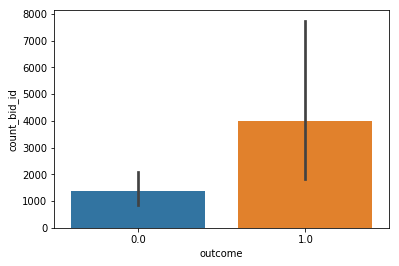

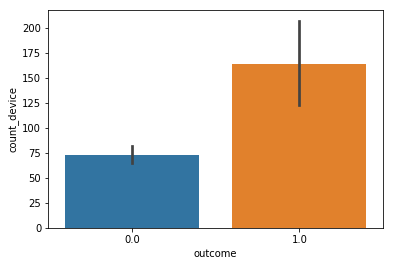

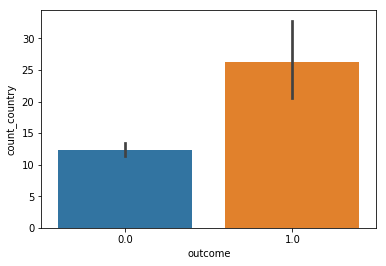

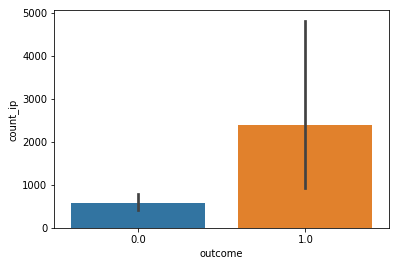

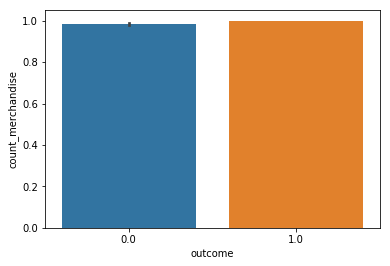

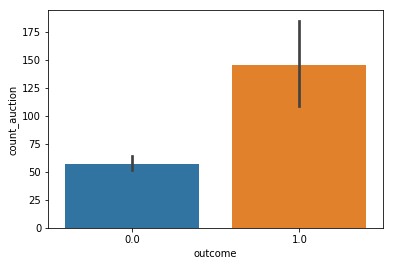

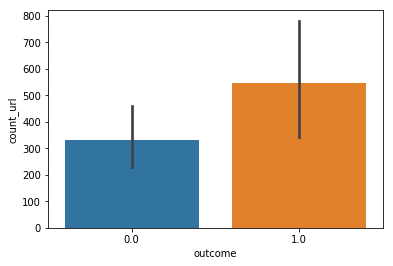

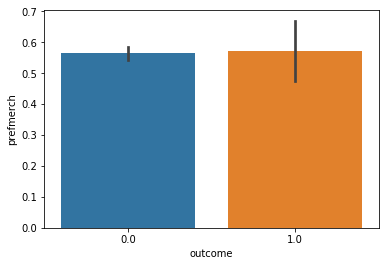

In [296]:
list2anz = ['count_bid_id','count_device','count_country', 'count_ip', 'count_merchandise', 'count_auction','count_url','prefmerch']

for col in list2anz:
    sns.barplot(data=train2_merged,y=col,x="outcome")
    plt.show()

In [343]:
# Create X and y 
selected_features=["bidder_id","payment_account","address",'count_device',
       'count_country', 'count_ip', 'count_merchandise', 'count_auction',
       'count_url']

# selected_features=["bidder_id","payment_account","address",'count_device',
#        'count_country', 'count_ip', 'count_merchandise', 'count_auction']

selected_features=["bidder_id","payment_account","address",'count_device',
       'count_country', 'count_ip', 'count_auction','count_url','prefmerch']

selected_features=["payment_account","address",'count_device',
       'count_country', 'count_ip', 'count_merchandise', 'count_auction',
       'count_url','prefmerch']

selected_features=['count_bid_id',"payment_account",'count_device',
       'count_country', 'count_ip', 'count_merchandise', 'count_auction',
       'count_url','prefmerch']

# y = train_merged["outcome"]
# X = train_merged[selected_features]

y = train2_merged["outcome"]
X = train2_merged[selected_features]

# Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [344]:
# # Logistic Regression model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
log1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = log1.fit()
res.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1409
Model:                            GLM   Df Residuals:                     1399
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.24
Date:                Tue, 05 Nov 2019   Deviance:                       546.49
Time:                        11:47:46   Pearson chi2:                 1.34e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -23.4416   1.66e+04     -0.001      0.999   -3.25e+04    3.24e+04
count_bid_id         -0.0001   6.09e-05     -1.645      0.100      -0.000    1.92e-05
payment_account      -0.0001      0.000     -0.582      0.561      -0.001       0.000
count_device          0.0008      0.002      0.425      0.671      -0.003       0.004
count_country         0.0008      0.009      0.089      0.929      -0.017       0.019
count_ip              0.0002      0.000      1.781      0.075   -1.93e-05       0.000
count_merchandise    20.5173   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
count_auction         0.0027      0.001      1.845      0.065      -0.000       0.006
count_url            -0.0002      0.000     -1.423      0.155      -0.000    6.49e-05
prefmerch            -0.2297      0.249     -0.922      0.357      -0.718       0.259
=====================================================================================
"""

In [345]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [346]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [347]:
y_train_pred_final = pd.DataFrame({'Outcome':y_train.values, 'Outcome_Prob':y_train_pred})
y_train_pred_final['bidder_id'] = y_train.index
y_train_pred_final.head()

,Outcome,Outcome_Prob,bidder_id
0,0.0,0.038961,1962
1,0.0,0.045151,883
2,0.0,0.049806,1432
3,0.0,0.037778,210
4,0.0,0.058938,376


In [348]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Outcome, y_train_pred_final.Outcome_Prob, drop_intermediate = False )

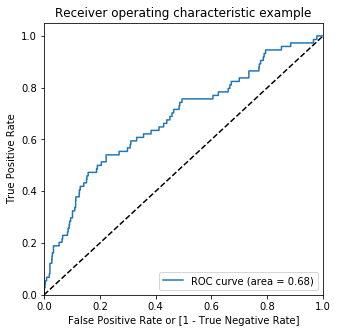

In [349]:
draw_roc(y_train_pred_final.Outcome, y_train_pred_final.Outcome_Prob)

In [304]:
# Let's create columns with different probability cutoffs 

# numbers = [0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65]
numbers = [0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Outcome_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Outcome,Outcome_Prob,bidder_id,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.2,0.25,0.3,0.35,0.4
0,0.0,0.038961,1962,1,1,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.045151,883,1,1,1,1,0,0,0,0,0,0,0,0,0
2,0.0,0.049806,1432,1,1,1,1,0,0,0,0,0,0,0,0,0
3,0.0,0.037778,210,1,1,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.058938,376,1,1,1,1,1,0,0,0,0,0,0,0,0


In [305]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
numbers = [0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65]
numbers = [0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
numbers = [0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Outcome, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.01  0.01  0.072392  1.000000  0.020974
0.02  0.02  0.073811  1.000000  0.022472
0.03  0.03  0.073101  0.986486  0.022472
0.04  0.04  0.396026  0.783784  0.374532
0.05  0.05  0.750177  0.540541  0.761798
0.06  0.06  0.848119  0.405405  0.872659
0.10  0.10  0.913414  0.189189  0.953558
0.15  0.15  0.931867  0.081081  0.979026
0.20  0.20  0.939674  0.067568  0.988015
0.25  0.25  0.944642  0.054054  0.994007
0.30  0.30  0.945351  0.040541  0.995506
0.35  0.35  0.946771  0.040541  0.997004
0.40  0.40  0.946771  0.027027  0.997753


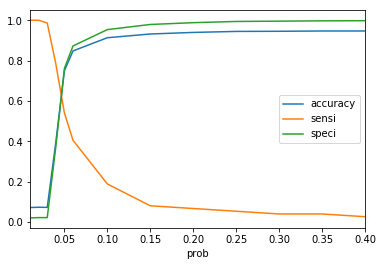

In [306]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [307]:
y_train_pred_final["final_predicted"]= y_train_pred_final.Outcome_Prob.map(lambda x: 1 if x > 0.055 else 0)
y_train_pred_final

,Outcome,Outcome_Prob,bidder_id,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.2,0.25,0.3,0.35,0.4,final_predicted
0,0.0,0.038961,1962,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.045151,883,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.049806,1432,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.037778,210,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.058938,376,1,1,1,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,0.041638,1879,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1405,0.0,0.043178,1895,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1406,0.0,0.355676,1859,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1407,0.0,0.037734,792,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [308]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Outcome, y_train_pred_final.final_predicted )
confusion2

array([[1125,  210],
       [  40,   34]])

In [309]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [310]:
# Putting CustID to index
y_test_df['bidder_id'] = y_test_df.index

In [311]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


1920    0.047488
1803    0.034880
75      0.043124
629     0.050051
1543    0.046000
785     0.073889
1935    0.050390
23      0.049760
1434    0.035651
492     0.041049
dtype: float64

In [312]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [313]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [314]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [315]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Outcome_Prob'})

In [316]:
# Rearranging the columns
# y_pred_final = y_pred_final.reindex_axis(['bidder_id','outcome','Outcome_Prob'], axis=1)
y_pred_final = y_pred_final.reindex(['bidder_id','outcome','Outcome_Prob'], axis=1)
y_pred_final.head()

,bidder_id,outcome,Outcome_Prob
0,1920,0.0,0.047488
1,1803,0.0,0.034880
2,75,0.0,0.043124
3,629,0.0,0.050051
4,1543,0.0,0.046000


In [317]:
y_pred_final['final_predicted'] = y_pred_final.Outcome_Prob.map(lambda x: 1 if x > 0.055 else 0)
y_pred_final.head()

,bidder_id,outcome,Outcome_Prob,final_predicted
0,1920,0.0,0.047488,0
1,1803,0.0,0.034880,0
2,75,0.0,0.043124,0
3,629,0.0,0.050051,0
4,1543,0.0,0.046000,0


In [318]:
y_pred_final[y_pred_final["outcome"]==1].head()

,bidder_id,outcome,Outcome_Prob,final_predicted
19,1523,1.0,0.044257,0
163,1534,1.0,0.036364,0
208,777,1.0,0.047551,0
235,1198,1.0,0.052140,0
240,719,1.0,0.051891,0


In [319]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.outcome, y_pred_final.final_predicted)

0.8013245033112583

In [320]:
confusion2 = metrics.confusion_matrix(y_pred_final.outcome, y_pred_final.final_predicted )
confusion2

array([[475, 100],
       [ 20,   9]])

#### Prediction

In [321]:
# X_test_sm.head()
X = test2_merged[selected_features]
X_test_sm = sm.add_constant(X)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.038015
1    0.027954
2    0.036832
3    0.048564
4    0.041439
5    0.046039
6    0.039329
7    0.064246
8    0.026955
9    0.046968
dtype: float64

In [322]:
# test_merged["pred_prob"]=y_test_pred
test_merged2["pred_prob"]=y_test_pred
# temp = test_merged.drop_duplicates(subset=["bidder_id"],keep="first")
test_merged2.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch,pred_prob
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0,0.038015
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1,0.027954
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1,0.036832
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0,0.048564
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0,0.041439


In [323]:
len(test_merged2)

4700

In [324]:
test_merged2['prediction'] = test_merged2["pred_prob"].map(lambda x: 1 if x > 0.055 else 0)
test_merged2.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch,pred_prob,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0,0.038015,0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1,0.027954,0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1,0.036832,0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0,0.048564,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0,0.041439,0


In [325]:
temp = test_merged2.drop_duplicates(subset=["bidder_id"],keep="first")
temp.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch,pred_prob,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0,0.038015,0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1,0.027954,0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1,0.036832,0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0,0.048564,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0,0.041439,0


In [326]:
# temp[["bidder_id","prediction"]].to_csv("../working/submission6.csv", index = False)

In [327]:
temp[["bidder_id","prediction"]].head()

,bidder_id,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0
1,a921612b85a1494456e74c09393ccb65ylp4y,0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0
3,eaf0ed0afc9689779417274b4791726cn5udi,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0


In [328]:
test_merged2['prediction'].value_counts()
temp['prediction'].value_counts()

0    4121
1     579
Name: prediction, dtype: int64

In [350]:
# Import relevant libraries
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from catboost import CatBoostClassifier 

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(probability=True,gamma="auto"),
    DecisionTreeClassifier(),
    CatBoostClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver="lbfgs")
]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [351]:
acc_dict = {}

for clf in classifiers:
        name = clf.__class__.__name__
          
#         clf.fit(X_train,y_train)
#         predict=clf.predict(X_test)
        clf.fit(X_train[selected_features],y_train)
        predict=clf.predict(X_test[selected_features])
        acc=accuracy_score(y_test,predict)
#         rec=recall_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc
            
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()

Learning rate set to 0.018461
0:	learn: 0.6609631	total: 62.2ms	remaining: 1m 2s
1:	learn: 0.6315242	total: 68.5ms	remaining: 34.2s
2:	learn: 0.6008513	total: 74.3ms	remaining: 24.7s
3:	learn: 0.5725085	total: 80ms	remaining: 19.9s
4:	learn: 0.5514578	total: 86ms	remaining: 17.1s
5:	learn: 0.5260636	total: 92.1ms	remaining: 15.3s
6:	learn: 0.5016252	total: 97.8ms	remaining: 13.9s
7:	learn: 0.4841918	total: 104ms	remaining: 12.9s
8:	learn: 0.4674650	total: 109ms	remaining: 12.1s
9:	learn: 0.4521215	total: 115ms	remaining: 11.4s
10:	learn: 0.4380133	total: 121ms	remaining: 10.9s
11:	learn: 0.4193933	total: 129ms	remaining: 10.6s
12:	learn: 0.4023135	total: 138ms	remaining: 10.5s
13:	learn: 0.3881944	total: 145ms	remaining: 10.2s
14:	learn: 0.3753111	total: 151ms	remaining: 9.94s
15:	learn: 0.3663566	total: 155ms	remaining: 9.54s
16:	learn: 0.3535285	total: 161ms	remaining: 9.3s
17:	learn: 0.3411303	total: 167ms	remaining: 9.09s
18:	learn: 0.3323567	total: 172ms	remaining: 8.9s
19:	learn:

162:	learn: 0.1058078	total: 1s	remaining: 5.14s
163:	learn: 0.1055509	total: 1.01s	remaining: 5.13s
164:	learn: 0.1053562	total: 1.01s	remaining: 5.12s
165:	learn: 0.1052168	total: 1.02s	remaining: 5.11s
166:	learn: 0.1049162	total: 1.02s	remaining: 5.1s
167:	learn: 0.1047177	total: 1.03s	remaining: 5.09s
168:	learn: 0.1045066	total: 1.03s	remaining: 5.09s
169:	learn: 0.1042671	total: 1.04s	remaining: 5.08s
170:	learn: 0.1039904	total: 1.04s	remaining: 5.07s
171:	learn: 0.1036725	total: 1.05s	remaining: 5.06s
172:	learn: 0.1034424	total: 1.06s	remaining: 5.05s
173:	learn: 0.1031219	total: 1.06s	remaining: 5.04s
174:	learn: 0.1029751	total: 1.07s	remaining: 5.04s
175:	learn: 0.1028147	total: 1.07s	remaining: 5.03s
176:	learn: 0.1027126	total: 1.08s	remaining: 5.02s
177:	learn: 0.1025512	total: 1.08s	remaining: 5.01s
178:	learn: 0.1023607	total: 1.09s	remaining: 5s
179:	learn: 0.1021999	total: 1.1s	remaining: 5s
180:	learn: 0.1020519	total: 1.1s	remaining: 4.99s
181:	learn: 0.1017683	to

334:	learn: 0.0769906	total: 2s	remaining: 3.96s
335:	learn: 0.0768424	total: 2s	remaining: 3.96s
336:	learn: 0.0766994	total: 2.01s	remaining: 3.95s
337:	learn: 0.0765873	total: 2.01s	remaining: 3.94s
338:	learn: 0.0765070	total: 2.02s	remaining: 3.94s
339:	learn: 0.0763609	total: 2.02s	remaining: 3.93s
340:	learn: 0.0763009	total: 2.03s	remaining: 3.92s
341:	learn: 0.0761860	total: 2.04s	remaining: 3.92s
342:	learn: 0.0761074	total: 2.04s	remaining: 3.91s
343:	learn: 0.0759706	total: 2.05s	remaining: 3.91s
344:	learn: 0.0758811	total: 2.05s	remaining: 3.9s
345:	learn: 0.0757913	total: 2.06s	remaining: 3.89s
346:	learn: 0.0757533	total: 2.07s	remaining: 3.89s
347:	learn: 0.0756402	total: 2.07s	remaining: 3.88s
348:	learn: 0.0755285	total: 2.08s	remaining: 3.88s
349:	learn: 0.0753472	total: 2.08s	remaining: 3.87s
350:	learn: 0.0752425	total: 2.09s	remaining: 3.87s
351:	learn: 0.0751578	total: 2.1s	remaining: 3.86s
352:	learn: 0.0750321	total: 2.1s	remaining: 3.85s
353:	learn: 0.0749966

505:	learn: 0.0635302	total: 2.99s	remaining: 2.92s
506:	learn: 0.0634669	total: 3s	remaining: 2.91s
507:	learn: 0.0634590	total: 3s	remaining: 2.91s
508:	learn: 0.0634368	total: 3.01s	remaining: 2.9s
509:	learn: 0.0633829	total: 3.01s	remaining: 2.9s
510:	learn: 0.0633037	total: 3.02s	remaining: 2.89s
511:	learn: 0.0632716	total: 3.02s	remaining: 2.88s
512:	learn: 0.0632647	total: 3.03s	remaining: 2.88s
513:	learn: 0.0632538	total: 3.04s	remaining: 2.87s
514:	learn: 0.0632264	total: 3.04s	remaining: 2.87s
515:	learn: 0.0631512	total: 3.05s	remaining: 2.86s
516:	learn: 0.0630410	total: 3.05s	remaining: 2.85s
517:	learn: 0.0630003	total: 3.06s	remaining: 2.85s
518:	learn: 0.0629887	total: 3.06s	remaining: 2.84s
519:	learn: 0.0629544	total: 3.07s	remaining: 2.83s
520:	learn: 0.0628285	total: 3.08s	remaining: 2.83s
521:	learn: 0.0628068	total: 3.08s	remaining: 2.82s
522:	learn: 0.0626888	total: 3.09s	remaining: 2.82s
523:	learn: 0.0626016	total: 3.1s	remaining: 2.81s
524:	learn: 0.0625815

678:	learn: 0.0541353	total: 3.99s	remaining: 1.89s
679:	learn: 0.0541036	total: 4s	remaining: 1.88s
680:	learn: 0.0540247	total: 4s	remaining: 1.87s
681:	learn: 0.0539912	total: 4.01s	remaining: 1.87s
682:	learn: 0.0539750	total: 4.01s	remaining: 1.86s
683:	learn: 0.0539095	total: 4.02s	remaining: 1.86s
684:	learn: 0.0538668	total: 4.02s	remaining: 1.85s
685:	learn: 0.0538337	total: 4.03s	remaining: 1.84s
686:	learn: 0.0538033	total: 4.03s	remaining: 1.84s
687:	learn: 0.0537749	total: 4.04s	remaining: 1.83s
688:	learn: 0.0537194	total: 4.05s	remaining: 1.83s
689:	learn: 0.0536915	total: 4.05s	remaining: 1.82s
690:	learn: 0.0535802	total: 4.06s	remaining: 1.81s
691:	learn: 0.0534468	total: 4.06s	remaining: 1.81s
692:	learn: 0.0533836	total: 4.07s	remaining: 1.8s
693:	learn: 0.0533097	total: 4.07s	remaining: 1.8s
694:	learn: 0.0532680	total: 4.08s	remaining: 1.79s
695:	learn: 0.0532376	total: 4.08s	remaining: 1.78s
696:	learn: 0.0531294	total: 4.09s	remaining: 1.78s
697:	learn: 0.053105

851:	learn: 0.0461289	total: 4.99s	remaining: 868ms
852:	learn: 0.0461045	total: 5s	remaining: 862ms
853:	learn: 0.0460258	total: 5.01s	remaining: 856ms
854:	learn: 0.0459912	total: 5.01s	remaining: 850ms
855:	learn: 0.0459510	total: 5.02s	remaining: 844ms
856:	learn: 0.0459334	total: 5.02s	remaining: 838ms
857:	learn: 0.0459210	total: 5.03s	remaining: 832ms
858:	learn: 0.0458887	total: 5.04s	remaining: 827ms
859:	learn: 0.0458555	total: 5.04s	remaining: 821ms
860:	learn: 0.0458065	total: 5.05s	remaining: 815ms
861:	learn: 0.0457372	total: 5.05s	remaining: 809ms
862:	learn: 0.0457038	total: 5.06s	remaining: 803ms
863:	learn: 0.0456800	total: 5.06s	remaining: 797ms
864:	learn: 0.0456566	total: 5.07s	remaining: 791ms
865:	learn: 0.0456239	total: 5.07s	remaining: 785ms
866:	learn: 0.0456009	total: 5.08s	remaining: 779ms
867:	learn: 0.0455900	total: 5.08s	remaining: 773ms
868:	learn: 0.0455324	total: 5.09s	remaining: 767ms
869:	learn: 0.0454522	total: 5.1s	remaining: 762ms
870:	learn: 0.04

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'Classifier Accuracy')

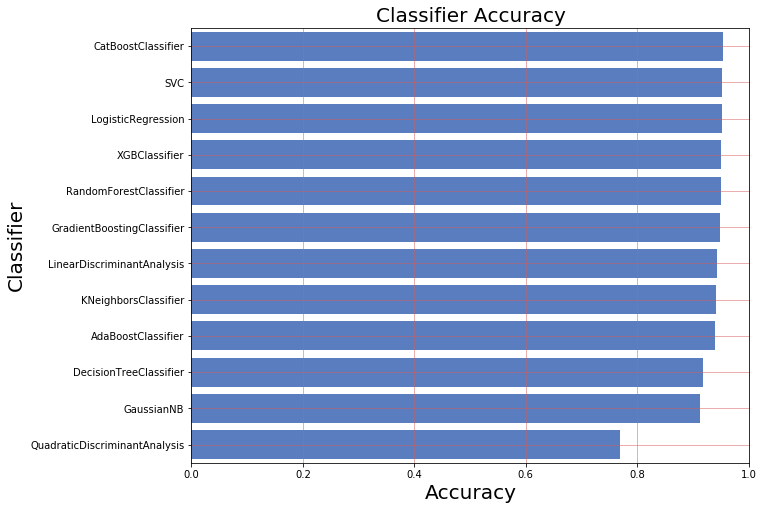

In [352]:
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))

log.sort_values(by="Accuracy",ascending=False,inplace=True)
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

In [353]:
xgb=XGBClassifier(max_depth=2, n_estimators=700, learning_rate=0.009,nthread=-1,subsample=1,colsample_bytree=0.8)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)


print(round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.95
[[572   3]
 [ 25   4]]
0.5714285714285714
0.13793103448275862


In [354]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print(round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.95
[[575   0]
 [ 29   0]]
0.0
0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [355]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print(round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.95
[[575   0]
 [ 29   0]]
0.0
0.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [356]:
knc = KNeighborsClassifier(3)
knc.fit(X_train,y_train)
y_pred=knc.predict(X_test)

print(round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.94
[[567   8]
 [ 27   2]]
0.2
0.06896551724137931


In [357]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

print(round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.92
[[544  31]
 [ 18  11]]
0.2619047619047619
0.3793103448275862


In [358]:
# Prediction with catboost algorithm.
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=False, one_hot_max_size=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.95
[[572   3]
 [ 25   4]]
0.5714285714285714
0.13793103448275862


In [338]:
# test.head()

In [360]:
X_test.head()

,count_bid_id,payment_account,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
1920,20.0,1000,11.0,2.0,17.0,1.0,13.0,2.0,0
1803,2.0,1448,2.0,2.0,2.0,1.0,2.0,1.0,1
75,1.0,1485,1.0,1.0,1.0,1.0,1.0,1.0,0
629,225.0,3,90.0,23.0,124.0,1.0,44.0,3.0,1
1543,1.0,926,1.0,1.0,1.0,1.0,1.0,1.0,0


In [363]:
selected_features

['count_bid_id',
 'payment_account',
 'count_device',
 'count_country',
 'count_ip',
 'count_merchandise',
 'count_auction',
 'count_url',
 'prefmerch']

In [364]:
test2_merged[selected_features].head()

,count_bid_id,payment_account,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,4.0,2637,2.0,3.0,4.0,1.0,3.0,3.0,0
1,3.0,3344,3.0,2.0,2.0,1.0,2.0,1.0,1
2,17.0,1259,4.0,3.0,4.0,1.0,14.0,2.0,1
3,148.0,3037,81.0,14.0,129.0,1.0,90.0,80.0,0
4,23.0,2375,17.0,2.0,17.0,1.0,20.0,1.0,0


In [366]:
# Predict using XGBClassifier - Score ??
# y_predict=xgb.predict(test)

# # Predict using LogisticRegression - Score ??
# y_predict=logreg.predict(test_merged)


# # Predict using KNeighborsClassifier - Score ??
# y_predict=logreg.predict(test[Selected_features])

# Predict using DecisionTreeClassifier - Score ??
y_predict=dtc.predict(test2_merged[selected_features])

In [367]:
bidder_id = test["bidder_id"]

temp = pd.DataFrame(pd.DataFrame({
        "bidder_id": bidder_id,
        "prediction": y_predict
    }))


temp.to_csv("../working/submission7.csv", index = False)

In [372]:
# temp.head()
# temp['prediction'].values_count()
temp['prediction'].value_counts()

0.0    4471
1.0     229
Name: prediction, dtype: int64